<h1>Challenge : Investigating a collection of clients that applied for a PayLater loan but were declined. </h1>

<h3> Introduction </h3>

In this challenge i will be investigating a collection of clients that applied for a PayLater loan but were declined. The dataset contains details about clients, their location , predicted income, employment status and other features used to determine whether a loan should be given or not. The goal in this challenge is to perform dimensionality reduction using Principal component analysis (PCA ) to reduce the features of the orignal dataset, use a K-means clustering to identify clusters of clients within the collection then perform Exploratory data analysis.
This notebook is organised as follows :
1. Data cleaning.
2. Implementing Principal Component Analysis.
3. Using KMeans function to cluster the numeric PCA dataframe and creating visualisations. using the said clusters.
4. Perform some Exploratory analysis after reconnecting the final clusters of each observation to the original dataframe.
5. Conclusion

In [67]:
# import required packages
import numpy as np
import pandas as pd 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')



In [2]:
# load the data set into the Notebook
df = pd.read_csv('week3_challenge.csv')
pd.options.display.max_columns = 290

In [3]:
# preview dataset
df.head()

,Unnamed: 0,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,DecisionFlag,Product,Income,ID,ApplicationID,__v,CompletedAt,score,demofeatures_debt_to_income_ratio,demofeatures_net_income_band,demofeatures_appweek,demofeatures_payweek,demofeatures_time_at_employer_mths,demofeatures_age_at_application_yrs,demofeatures_device,demofeatures_loan_purpose,demofeatures_time_curr_address,demofeatures_residence_state,demofeatures_bank_name,demofeatures_level_of_education,demofeatures_marital_status,demofeatures_residential_status,demofeatures_employment_status_clients,demofeatures_gender,demofeatures_num_children,demofeatures_num_employers,demofeatures_next_of_kin_relationship,demofeatures_avg_household_exp_pm,demofeatures_num_in_household,demofeatures_facebookid,smsFeatures_minmaxdebit_tot,smsFeatures_mixmaxcredit_tot,smsFeatures_minbal_tot,smsFeatures_pers_sms_snt_flag,smsFeatures_pers_sms_rec_flag,smsFeatures_arrears_flag,smsFeatures_isp_flag,smsFeatures_sattv_flag,smsFeatures_avg_mly_airtimecredit_val,smsFeatures_avg_airtimecredit_tx_val,smsFeatures_tot_airtimecredit_vol,smsFeatures_tot_airtimecredit_val,smsFeatures_avg_mly_uber_val,smsFeatures_avg_uber_tx_val,smsFeatures_tot_uber_vol,smsFeatures_tot_uber_val,smsFeatures_avg_mly_gamble_val,smsFeatures_avg_gamble_tx_val,smsFeatures_tot_gamble_vol,smsFeatures_tot_gamble_val,smsFeatures_loans_prev2mnths,smsFeatures_loan_pmnts,smsFeatures_val_loans,smsFeatures_avg_sal,smsFeatures_debit_credit_ratio,smsFeatures_avg_mly_deb_val,smsFeatures_avg_mly_cred_val,smsFeatures_avg_deb_tx_val,smsFeatures_avg_cred_tx_val,smsFeatures_tot_deb_vol,smsFeatures_tot_deb_val,smsFeatures_tot_cred_vol,smsFeatures_tot_cred_val,smsFeatures_num_mnths_obs,jazzScore,clientKey,loanKey,loanId,contactFeatures_ratio_surnames,contactFeatures_avg_calls_per_day_contacts,contactFeatures_share_of_contacts_called,contactFeatures_days_active_caller_contacts,contactFeatures_days_since_last_call_contacts,contactFeatures_days_since_first_call_contacts,contactFeatures_no_contacts_called,contactFeatures_calls_volume_contacts,contactFeatures_most_called_contact_call_volume,contactFeatures_no_contacts,utcOffset,clientId,createdAt,callFeatures_dur_01_miss,callFeatures_dur_02_miss,callFeatures_dur_03_miss,callFeatures_dur_04_miss,callFeatures_dur_05_miss,callFeatures_dur_06_miss,callFeatures_dur_07_miss,callFeatures_dur_08_miss,callFeatures_dur_09_miss,callFeatures_dur_10_miss,callFeatures_dur_11_miss,callFeatures_dur_12_miss,callFeatures_dur_13_miss,callFeatures_dur_14_miss,callFeatures_dur_15_miss,callFeatures_dur_16_miss,callFeatures_dur_17_miss,callFeatures_dur_18_miss,callFeatures_dur_19_miss,callFeatures_dur_20_miss,callFeatures_dur_21_miss,callFeatures_dur_22_miss,callFeatures_dur_23_miss,callFeatures_01_miss,callFeatures_02_miss,callFeatures_03_miss,callFeatures_04_miss,callFeatures_05_miss,callFeatures_06_miss,callFeatures_07_miss,callFeatures_08_miss,callFeatures_09_miss,callFeatures_10_miss,callFeatures_11_miss,callFeatures_12_miss,callFeatures_13_miss,callFeatures_14_miss,callFeatures_15_miss,callFeatures_16_miss,callFeatures_17_miss,callFeatures_18_miss,callFeatures_19_miss,callFeatures_20_miss,callFeatures_21_miss,callFeatures_22_miss,callFeatures_23_miss,callFeatures_dur_01_out,callFeatures_dur_02_out,callFeatures_dur_03_out,callFeatures_dur_04_out,callFeatures_dur_05_out,callFeatures_dur_06_out,callFeatures_dur_07_out,callFeatures_dur_08_out,callFeatures_dur_09_out,callFeatures_dur_10_out,callFeatures_dur_11_out,callFeatures_dur_12_out,callFeatures_dur_13_out,callFeatures_dur_14_out,callFeatures_dur_15_out,callFeatures_dur_16_out,callFeatures_dur_17_out,callFeatures_dur_18_out,callFeatures_dur_19_out,callFeatures_dur_20_out,callFeatures_dur_21_out,callFeatures_dur_22_out,callFeatures_dur_23_out,callFeatures_01_out,callFeatures_02_out,callFeatures_03_out,callFeatures_04_out,callFeatures_05_out,callFeatures_06_out,callFeatures_07_out,callFeatures_

In [4]:
df.shape

(11993, 290)

In [5]:
#are there duplicated rows
sum(df.duplicated())

0

In [5]:
df.dtypes

Unnamed: 0                                      int64
createdAt_Month                                 int64
Reason                                         object
application_id                                 object
SystemCustomerID                                int64
SystemLoanID                                    int64
income_source                                  object
income_verified                                  bool
next_loan_number                                int64
country                                        object
DecisionFlag                                   object
Product                                        object
Income                                        float64
ID                                             object
ApplicationID                                  object
__v                                           float64
CompletedAt                                    object
score                                         float64
demofeatures_debt_to_income_

In [6]:
# inspect column
df['Unnamed: 0'].nunique() 

11993

In [7]:
#cliendId
df['clientId'].dtype

dtype('float64')

In [8]:
#createdAt column
df['createdAt'].isna().sum()

5676

# 1. Data Cleaning
in this session i will be assessing the dataset and inspecting, if there are other data quality issues that needs cleaning asides those stated in the challenge.
<h5> Assessment </h5>
<ul>
<li>Column 'Unnamed: 0' has values that represents an index.</li>
<li>Column createdAt_Month is of type int but represents a date.</li>
<li>Two columns SystemCustomerID and SystemLoanID are of type int but represent id and aggregations are not to be performed on Ids.</li>
<li>Two columns representing a single variable ApplicationID.</li>
<li> Column __v  contains only 0.0.</li>
<li>CompletedAt column is of type string.</li>
<li> There are two CreatedAt columns.</li> 
<li>clientId is of type float.</li> 
</ul>

<h5> Data cleaning </h5>
<ul>
<li>Remove columns from the dataframe that have more than 30% of their values missing.</li>
<li>Replace null values in the numeric dataframe with 0.</li>
<li>Create a new dataframe containing only the numeric columns (integers and floats) in the dataset.</li>
<li>Drop columns 'Unnamed: 0', '__V' and ' ApplicationID'.</li>
<li>Change createdAt_Month to datetime datatype.</li>
    <li>change SystemCustomerID and SystemLoanID to string datatype.</li>    
<li>1 CreatedAt column will be dropped,it has more than 30% of its values missing.
</ul>

In [6]:
#create copy of dataframe 
df_clean = df.copy()

In [7]:
# dropped columns that have more than 30% of their values missing
for col in df_clean.columns:
    na = sum(df_clean[col].isna())
    if (na/len(df_clean)) * 100 > 30:
        df_clean.drop(columns=col,inplace=True)
        

In [8]:
df_clean.shape

(11993, 272)

18 columns where dropped

In [9]:
#fill missing values with 0
df_clean.fillna(value=0,axis=0,inplace=True)

In [10]:
df_clean.isna().sum()

Unnamed: 0                                    0
createdAt_Month                               0
Reason                                        0
application_id                                0
SystemCustomerID                              0
SystemLoanID                                  0
income_source                                 0
income_verified                               0
next_loan_number                              0
country                                       0
DecisionFlag                                  0
Product                                       0
Income                                        0
ID                                            0
ApplicationID                                 0
__v                                           0
CompletedAt                                   0
demofeatures_net_income_band                  0
demofeatures_appweek                          0
demofeatures_time_at_employer_mths            0
demofeatures_age_at_application_yrs     

In [11]:
#change datatypes of columns with wrong datatypes
#1 ApplicationId column
df_clean['application_id'] = df_clean['application_id'].astype(str)

In [12]:
df_clean['application_id'].dtype

dtype('O')

In [13]:
#2 SystemCustomerId column
df_clean['SystemCustomerID'] = df_clean['SystemCustomerID'].astype(str)

In [14]:
df_clean['SystemCustomerID'].dtype

dtype('O')

In [15]:
#3 SystemLoanId column
df_clean['SystemLoanID'] = df_clean['SystemLoanID'].astype(str)

In [16]:
df_clean['SystemLoanID'].dtype

dtype('O')

In [17]:
#4 clientId column
df_clean['clientId'] = df_clean['clientId'].astype(str)

In [18]:
df_clean['clientId'].dtype

dtype('O')

In [19]:
#change dataype of createdAt_Month column
df_clean['createdAt_Month'] = pd.to_datetime(df_clean['createdAt_Month'],format='%Y%m')

In [20]:
df_clean['createdAt_Month'].dtype

dtype('<M8[ns]')

In [21]:
df_clean['createdAt_Month'].head()

0   2018-12-01
1   2018-09-01
2   2018-10-01
3   2018-12-01
4   2019-01-01
Name: createdAt_Month, dtype: datetime64[ns]

In [22]:
#drop irrelevant and duplucate columns 'Unnamed: 0','__v','ApplicationID'
df_clean.drop(columns=['Unnamed: 0','__v','ApplicationID'],axis=1,inplace=True)

In [23]:
df_clean.shape

(11993, 269)

In [24]:
# select numeric features for PCA
df_numeric = df_clean.select_dtypes(include=['int','float64'])

In [27]:
df_numeric.shape

(11993, 243)

243 columns remained after selecting features with numeric data types

# 2. Principal Component Analysis
Implementing Principal Component Analysis

In [25]:
#Scale the numeric dataframe
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()


In [26]:
x_scalar =  scalar.fit_transform(df_numeric)

In [27]:
#create dataframe of scaled data
pd.DataFrame(data = x_scalar, columns = df_numeric.columns).head()

,next_loan_number,Income,demofeatures_net_income_band,demofeatures_appweek,demofeatures_age_at_application_yrs,demofeatures_num_children,smsFeatures_minmaxdebit_tot,smsFeatures_mixmaxcredit_tot,smsFeatures_minbal_tot,smsFeatures_pers_sms_snt_flag,smsFeatures_pers_sms_rec_flag,smsFeatures_arrears_flag,smsFeatures_isp_flag,smsFeatures_sattv_flag,smsFeatures_avg_mly_airtimecredit_val,smsFeatures_avg_airtimecredit_tx_val,smsFeatures_tot_airtimecredit_vol,smsFeatures_tot_airtimecredit_val,smsFeatures_avg_mly_uber_val,smsFeatures_avg_uber_tx_val,smsFeatures_tot_uber_vol,smsFeatures_tot_uber_val,smsFeatures_avg_mly_gamble_val,smsFeatures_avg_gamble_tx_val,smsFeatures_tot_gamble_vol,smsFeatures_tot_gamble_val,smsFeatures_loans_prev2mnths,smsFeatures_loan_pmnts,smsFeatures_val_loans,smsFeatures_avg_sal,smsFeatures_debit_credit_ratio,smsFeatures_avg_mly_deb_val,smsFeatures_avg_mly_cred_val,smsFeatures_avg_deb_tx_val,smsFeatures_avg_cred_tx_val,smsFeatures_tot_deb_vol,smsFeatures_tot_deb_val,smsFeatures_tot_cred_vol,smsFeatures_tot_cred_val,smsFeatures_num_mnths_obs,contactFeatures_ratio_surnames,contactFeatures_avg_calls_per_day_contacts,contactFeatures_share_of_contacts_called,contactFeatures_days_active_caller_contacts,contactFeatures_days_since_last_call_contacts,contactFeatures_days_since_first_call_contacts,contactFeatures_no_contacts_called,contactFeatures_calls_volume_contacts,contactFeatures_most_called_contact_call_volume,contactFeatures_no_contacts,callFeatures_dur_01_miss,callFeatures_dur_02_miss,callFeatures_dur_03_miss,callFeatures_dur_04_miss,callFeatures_dur_05_miss,callFeatures_dur_06_miss,callFeatures_dur_07_miss,callFeatures_dur_08_miss,callFeatures_dur_09_miss,callFeatures_dur_10_miss,callFeatures_dur_11_miss,callFeatures_dur_12_miss,callFeatures_dur_13_miss,callFeatures_dur_14_miss,callFeatures_dur_15_miss,callFeatures_dur_16_miss,callFeatures_dur_17_miss,callFeatures_dur_18_miss,callFeatures_dur_19_miss,callFeatures_dur_20_miss,callFeatures_dur_21_miss,callFeatures_dur_22_miss,callFeatures_dur_23_miss,callFeatures_01_miss,callFeatures_02_miss,callFeatures_03_miss,callFeatures_04_miss,callFeatures_05_miss,callFeatures_06_miss,callFeatures_07_miss,callFeatures_08_miss,callFeatures_09_miss,callFeatures_10_miss,callFeatures_11_miss,callFeatures_12_miss,callFeatures_13_miss,callFeatures_14_miss,callFeatures_15_miss,callFeatures_16_miss,callFeatures_17_miss,callFeatures_18_miss,callFeatures_19_miss,callFeatures_20_miss,callFeatures_21_miss,callFeatures_22_miss,callFeatures_23_miss,callFeatures_dur_01_out,callFeatures_dur_02_out,callFeatures_dur_03_out,callFeatures_dur_04_out,callFeatures_dur_05_out,callFeatures_dur_06_out,callFeatures_dur_07_out,callFeatures_dur_08_out,callFeatures_dur_09_out,callFeatures_dur_10_out,callFeatures_dur_11_out,callFeatures_dur_12_out,callFeatures_dur_13_out,callFeatures_dur_14_out,callFeatures_dur_15_out,callFeatures_dur_16_out,callFeatures_dur_17_out,callFeatures_dur_18_out,callFeatures_dur_19_out,callFeatures_dur_20_out,callFeatures_dur_21_out,callFeatures_dur_22_out,callFeatures_dur_23_out,callFeatures_01_out,callFeatures_02_out,callFeatures_03_out,callFeatures_04_out,callFeatures_05_out,callFeatures_06_out,callFeatures_07_out,callFeatures_08_out,callFeatures_09_out,callFeatures_10_out,callFeatures_11_out,callFeatures_12_out,callFeatures_13_out,callFeatures_14_out,callFeatures_15_out,callFeatures_16_out,callFeatures_17_out,callFeatures_18_out,callFeatures_19_out,callFeatures_20_out,callFeatures_21_out,callFeatures_22_out,callFeatures_23_out,callFeatures_dur_01_in,callFeatures_dur_02_in,callFeatures_dur_03_in,callFeatures_dur_04_in,callFeatures_dur_05_in,callFeatures_dur_06_in,callFeatures_dur_07_in,callFeatures_dur_08_in,callFeatures_dur_09_in,callFeatures_dur_10_in,callFeatures_dur_11_in,callFeatures_dur_12_in,callFeatures_dur_13_in,callFeatures_dur_14_in,callFeatures_dur_15_in,callFeatures_dur_16_in,callFeatures_dur_17_in,callFeatures_dur_18_in,callFeatures_dur_19_in,callFeatures_dur_20_

In [28]:
#pca for 5 n components
# create pca
pca_5 = PCA(n_components= 5)

In [30]:
# fit the data to the model
x_pca5 =  pca_5.fit_transform(x_scalar)

In [31]:
#explained variance for 5 components
#explained variance
pca_5.explained_variance_

array([0.5304327 , 0.16904087, 0.08485131, 0.05171762, 0.04732598])

In [32]:
pca_5.explained_variance_.sum()

0.8833684811833777

In [33]:
#explained variance sum
pca_5.explained_variance_.sum()

0.8833684811833777

In [34]:
#sum of explained variance ratio
pca_5.explained_variance_ratio_.sum()

0.7497020804210499

### Note: https://hackernoon.com/supervised-machine-learning-dimensional-reduction-and-principal-component-analysis-614dec1f6b4c   - reference
In real life we are more likely to work with higher dimensional data sets. As a result, we may need to include addition Principal Components in order to capture the more of the variance in our data set. Thereby, increasing the performance of our Machine Learning algorithm
### Machine Learning:
It is preferred in most machine learning problems to capture at least 95% of the training set's variance. Thus, it is not necessary to stick with 2 or 3 Principal Components

The reason why i used 30 components for my model is described above, the 5 components only describes 75 % of explained variance.

In [38]:
# create pca of at least 95% explained variance
pca_scalar = PCA(n_components= .95)

In [39]:
# fit the data to the model
x_pca =  pca_scalar.fit_transform(x_scalar)

In [41]:
#explained variance
pca_scalar.explained_variance_

array([0.5304327 , 0.16904087, 0.08485131, 0.05171762, 0.04732598,
       0.03346762, 0.02504831, 0.02383707, 0.02168212, 0.02051498,
       0.01257519, 0.01161534, 0.00955086, 0.00838463, 0.00804759,
       0.00767253, 0.00617235, 0.00562353, 0.00554028, 0.00497479,
       0.00457627, 0.0041711 , 0.00370794, 0.00320722, 0.00317066,
       0.00281266, 0.00266452, 0.00258308, 0.00253234, 0.00240355])

In [42]:
#explained variance sum
pca_scalar.explained_variance_.sum()

1.1199050133274884

In [43]:
#explained variance
pca_scalar.explained_variance_ratio_

array([0.45017058, 0.14346255, 0.07201208, 0.043892  , 0.04016488,
       0.02840349, 0.02125814, 0.02023018, 0.0184013 , 0.01741077,
       0.01067238, 0.00985777, 0.00810568, 0.00711592, 0.00682987,
       0.00651156, 0.00523838, 0.00477261, 0.00470196, 0.00422204,
       0.00388381, 0.00353995, 0.00314687, 0.00272192, 0.00269089,
       0.00238707, 0.00226134, 0.00219222, 0.00214916, 0.00203986])

In [44]:
#sum of explained variance ratio
pca_scalar.explained_variance_ratio_.sum()

0.950447221346231

In [39]:
len(pca_scalar.explained_variance_ratio_)

30

30 is the number of principal components needed, such that 95% of the variance is retained

# 3. Kmeans Clustering
Using KMeans function to cluster the numeric PCA dataframe and creating visualisations. using the said clusters

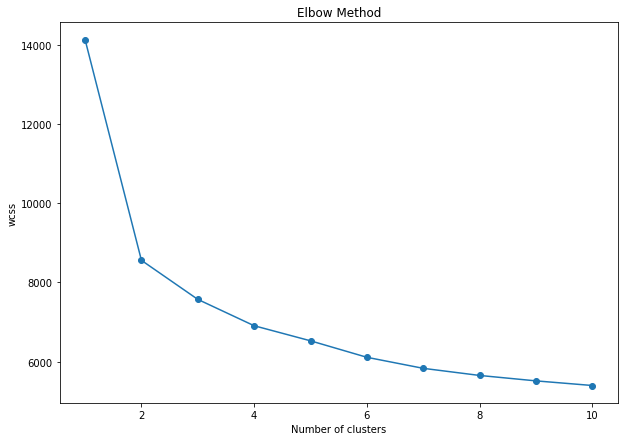

In [40]:
#made a plot to determine the value of k using an elbow plot
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x_scalar)
    wcss.append(km.inertia_)
plt.figure(figsize = (10,7))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [45]:
# declare a Kmeans instance with 3 clusters
model = KMeans(n_clusters=3)

In [46]:
# fit data 
model.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
# get clusters
clusters = model.predict(x_pca)

In [45]:
len(clusters)

11993

In [ ]:
#Reconnect the final clusters of each observation to the original dataframe
df_clean['Clusters'] = model.labels_

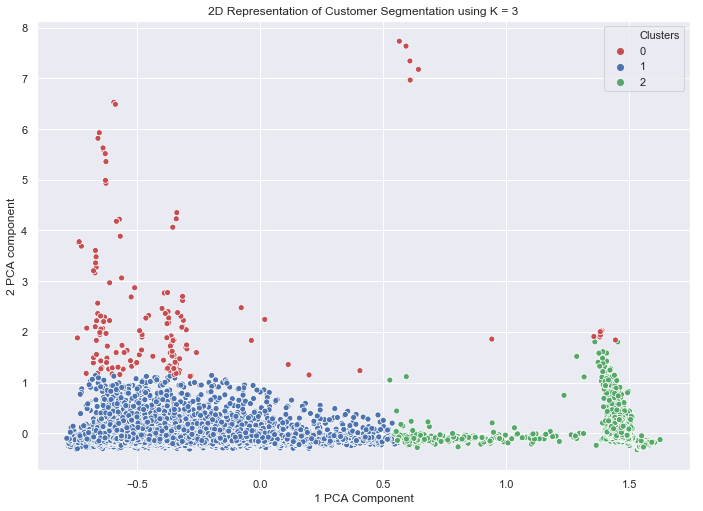

In [94]:
#plot the clusters
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=x_pca[:,0],y=x_pca[:, 1],hue=df_clean['Clusters'],legend='brief',
                palette=['r','b','g']);
plt.title('2D Representation of Customer Segmentation using K = 3');
plt.xlabel('1 PCA Component');
plt.ylabel('2 PCA component');

# 4. Exploratory Data Analysis
In this section, i'll be using descriptive statistics and creating visualizations with the goal of finding insights from the clusters.

In [49]:
#Reconnect the final clusters of each observation to the original dataframe
df_clean['Clusters'] = model.labels_

In [87]:
df_clean.shape

(11993, 270)

In [51]:
#preview the dataset
df_clean.head()

,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,DecisionFlag,Product,Income,ID,CompletedAt,demofeatures_net_income_band,demofeatures_appweek,demofeatures_time_at_employer_mths,demofeatures_age_at_application_yrs,demofeatures_device,demofeatures_loan_purpose,demofeatures_time_curr_address,demofeatures_residence_state,demofeatures_bank_name,demofeatures_level_of_education,demofeatures_marital_status,demofeatures_residential_status,demofeatures_employment_status_clients,demofeatures_gender,demofeatures_num_children,demofeatures_facebookid,smsFeatures_minmaxdebit_tot,smsFeatures_mixmaxcredit_tot,smsFeatures_minbal_tot,smsFeatures_pers_sms_snt_flag,smsFeatures_pers_sms_rec_flag,smsFeatures_arrears_flag,smsFeatures_isp_flag,smsFeatures_sattv_flag,smsFeatures_avg_mly_airtimecredit_val,smsFeatures_avg_airtimecredit_tx_val,smsFeatures_tot_airtimecredit_vol,smsFeatures_tot_airtimecredit_val,smsFeatures_avg_mly_uber_val,smsFeatures_avg_uber_tx_val,smsFeatures_tot_uber_vol,smsFeatures_tot_uber_val,smsFeatures_avg_mly_gamble_val,smsFeatures_avg_gamble_tx_val,smsFeatures_tot_gamble_vol,smsFeatures_tot_gamble_val,smsFeatures_loans_prev2mnths,smsFeatures_loan_pmnts,smsFeatures_val_loans,smsFeatures_avg_sal,smsFeatures_debit_credit_ratio,smsFeatures_avg_mly_deb_val,smsFeatures_avg_mly_cred_val,smsFeatures_avg_deb_tx_val,smsFeatures_avg_cred_tx_val,smsFeatures_tot_deb_vol,smsFeatures_tot_deb_val,smsFeatures_tot_cred_vol,smsFeatures_tot_cred_val,smsFeatures_num_mnths_obs,contactFeatures_ratio_surnames,contactFeatures_avg_calls_per_day_contacts,contactFeatures_share_of_contacts_called,contactFeatures_days_active_caller_contacts,contactFeatures_days_since_last_call_contacts,contactFeatures_days_since_first_call_contacts,contactFeatures_no_contacts_called,contactFeatures_calls_volume_contacts,contactFeatures_most_called_contact_call_volume,contactFeatures_no_contacts,clientId,callFeatures_dur_01_miss,callFeatures_dur_02_miss,callFeatures_dur_03_miss,callFeatures_dur_04_miss,callFeatures_dur_05_miss,callFeatures_dur_06_miss,callFeatures_dur_07_miss,callFeatures_dur_08_miss,callFeatures_dur_09_miss,callFeatures_dur_10_miss,callFeatures_dur_11_miss,callFeatures_dur_12_miss,callFeatures_dur_13_miss,callFeatures_dur_14_miss,callFeatures_dur_15_miss,callFeatures_dur_16_miss,callFeatures_dur_17_miss,callFeatures_dur_18_miss,callFeatures_dur_19_miss,callFeatures_dur_20_miss,callFeatures_dur_21_miss,callFeatures_dur_22_miss,callFeatures_dur_23_miss,callFeatures_01_miss,callFeatures_02_miss,callFeatures_03_miss,callFeatures_04_miss,callFeatures_05_miss,callFeatures_06_miss,callFeatures_07_miss,callFeatures_08_miss,callFeatures_09_miss,callFeatures_10_miss,callFeatures_11_miss,callFeatures_12_miss,callFeatures_13_miss,callFeatures_14_miss,callFeatures_15_miss,callFeatures_16_miss,callFeatures_17_miss,callFeatures_18_miss,callFeatures_19_miss,callFeatures_20_miss,callFeatures_21_miss,callFeatures_22_miss,callFeatures_23_miss,callFeatures_dur_01_out,callFeatures_dur_02_out,callFeatures_dur_03_out,callFeatures_dur_04_out,callFeatures_dur_05_out,callFeatures_dur_06_out,callFeatures_dur_07_out,callFeatures_dur_08_out,callFeatures_dur_09_out,callFeatures_dur_10_out,callFeatures_dur_11_out,callFeatures_dur_12_out,callFeatures_dur_13_out,callFeatures_dur_14_out,callFeatures_dur_15_out,callFeatures_dur_16_out,callFeatures_dur_17_out,callFeatures_dur_18_out,callFeatures_dur_19_out,callFeatures_dur_20_out,callFeatures_dur_21_out,callFeatures_dur_22_out,callFeatures_dur_23_out,callFeatures_01_out,callFeatures_02_out,callFeatures_03_out,callFeatures_04_out,callFeatures_05_out,callFeatures_06_out,callFeatures_07_out,callFeatures_08_out,callFeatures_09_out,callFeatures_10_out,callFeatures_11_out,callFeatures_12_out,callFeatures_13_out,callFeatures_14_out,callFeatures_15_out,callFeatures_16_out,callFeatures_17_out,callFeatures_18_out,callFeatures_19_out,callFeatures_20_out,callFeatures_21_out,callFea

## Note : 
i will be taking index zero as cluster 1, index 1 as cluster 2,and index 2 as cluster 3

### 1 : Average income of each cluster 

In [53]:
# finding the mean
round(df_clean.groupby('Clusters').mean()['Income'],2)

Clusters
0    72551.06
1    42463.58
2    62414.29
Name: Income, dtype: float64

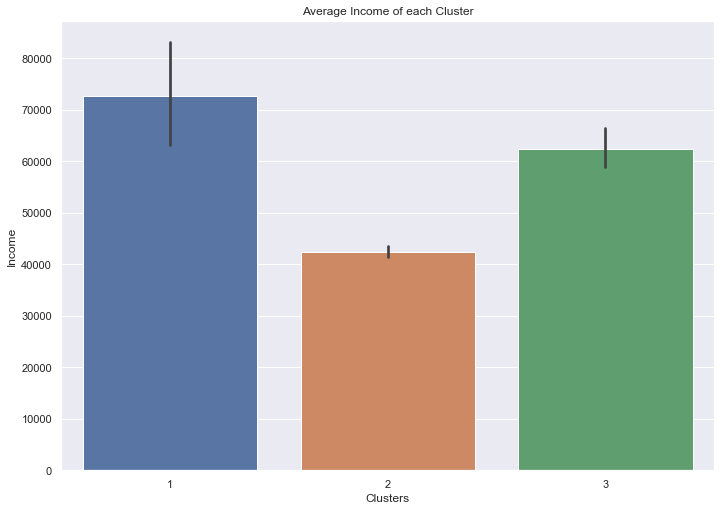

In [93]:
#ploting a barchart visualizing the average income of each cluster
sns.barplot(data=df_clean,x='Clusters',y='Income',capsize=0);
plt.xticks([0, 1,2], ['1', '2','3']);
plt.title('Average Income of each Cluster');

Clients in cluster 1 have the highest income.

### 2 : Average Predicted income of each cluster 

In [54]:
# finding the mean
round(df_clean.groupby('Clusters').mean()['predictedIncome'],2)

Clusters
0    51905.26
1    36043.17
2    45511.95
Name: predictedIncome, dtype: float64

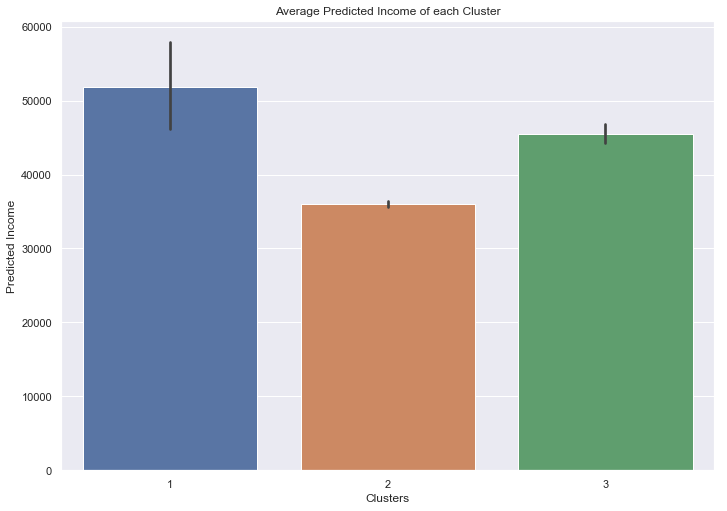

In [89]:
#ploting a barchart visualizing the average Predicted income of each cluster
plt.title('Average Predicted Income of each Cluster')
sns.barplot(data=df_clean,x='Clusters',y='predictedIncome');
plt.xticks([0, 1,2], ['1', '2','3']);
plt.ylabel('Predicted Income');

clients in cluster 1 have the highest predicted income.

### 3 : Which Gender Requested for Loans more ?

In [113]:
#count number of loan requests grouped by gender
df_clean.demofeatures_gender.value_counts()

MALE      9678
FEMALE    2313
0            2
Name: demofeatures_gender, dtype: int64

In [117]:
Male = 9678
female = 2313
no_gender = 2

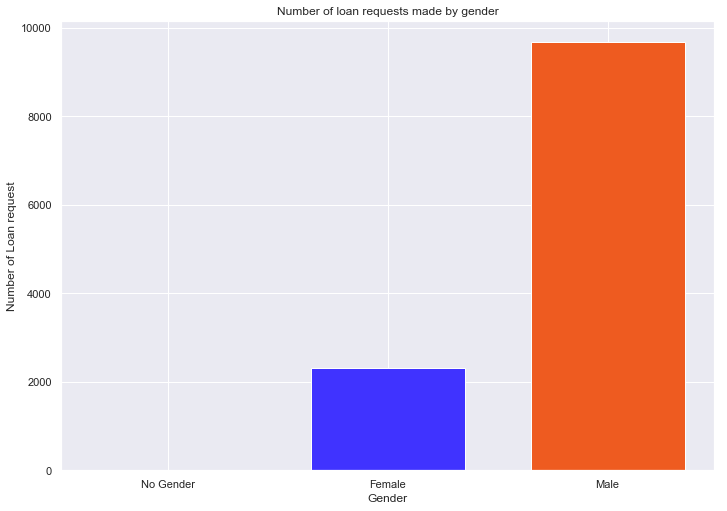

In [120]:
#plotting the barchart
plt.bar([1, 2,3],[no_gender,female,Male],width=0.7, color = ['red','#4033FF','#ee5b20'])
plt.xlabel('Gender')
plt.ylabel('Number of Loan request')
plt.xticks([1, 2,3], ['No Gender', 'Female','Male'])
plt.title('Number of loan requests made by gender');


Males made more loan requests.

### 4 : Which loan purpose occurred most in each cluster

In [132]:
#### cluster 1
df_clean.groupby(['Clusters','demofeatures_loan_purpose']).count()['Reason'][0]

demofeatures_loan_purpose
business     87
education     5
house        22
medical      28
other        37
Name: Reason, dtype: int64

In [129]:
#### cluster 2
df_clean.groupby(['Clusters','demofeatures_loan_purpose']).count()['Reason'][1]

demofeatures_loan_purpose
business     4646
education    1044
house         977
medical      1466
other        1439
Name: Reason, dtype: int64

In [142]:
#### cluster 3
df_clean.groupby(['Clusters','demofeatures_loan_purpose']).count()['Reason'][2]

demofeatures_loan_purpose
0               2
business     1079
education     245
house         267
medical       280
other         369
Name: Reason, dtype: int64

Clients in each of the 3 clusters made request for loan to do Business more than any other purpose

# 5. Conclusion
After performing Exploratory data analysis on the dataset, i found out the following :
1. Clients in Cluster 1 have more income on average than clients in other clusters.
2. Clients in Cluster 1 have more Predicted income on average than clients in other clusters.
3. Males requested for loans more than females.
4. Doing Business was the most occurring purpose for which clients requested a loan